In [35]:
from google.colab import drive
drive.mount('/gdrive')
%cd gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive'
/content


In [70]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

datas = pd.read_excel('/gdrive/My Drive/KerasDeepLearning/maliciousornot.xlsx')

In [71]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [72]:
datas.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,1.141613,102.672734,1054.061525,3333.335724,424.041644,0.009134,0.235648,1.549989,0.090850,0.309790,0.019027,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,9.374137,365.368355,1057.620796,2298.396221,2021.142069,0.003906,2.215631,23.059178,1.035261,2.788495,0.331812,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,0.064715,0.144430,0.466579,0.999220,13.056960,0.003455,0.002917,0.000000,0.000000,0.010210,0.001159,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,0.074737,0.304533,1.108708,1927.132167,24.015480,0.006637,0.016901,0.019352,0.010198,0.019436,0.002907,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,0.079767,0.444688,1325.126000,2827.712667,34.255090,0.008242,0.026800,0.033860,0.014313,0.024275,0.004155,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,0.086013,0.764862,1814.114333,4181.336000,66.709667,0.010620,0.042212,0.055091,0.019213,0.030505,0.005840,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,101.036000,3721.492667,5046.618667,12703.334000,12737.012667,0.040324,34.974000,512.952000,15.544000,40.155333,7.772000,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [73]:
datas.corr()['Type'].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [74]:
x = datas.drop('Type',axis=1).values
y = datas['Type'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)


scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

earlyStopping = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=25)

In [75]:
model.fit(x= x_train, y= y_train, validation_data=(x_test, y_test), verbose=1, callbacks=[earlyStopping], epochs=700)

Epoch 1/700
12/12 [==============================] - 0s 10ms/step - loss: 0.7060 - val_loss: 0.6914
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6988 - val_loss: 0.6897
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6826 - val_loss: 0.6878
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6827 - val_loss: 0.6862
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6853 - val_loss: 0.6849
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6758 - val_loss: 0.6850
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6657 - val_loss: 0.6843
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6778 - val_loss: 0.6833
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6682 - val_loss: 0.6832
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6686 - val_loss: 0.6828
Epoch 11

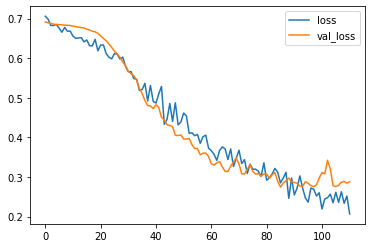

In [76]:
loss_datas = pd.DataFrame(model.history.history)
loss_datas.plot()

In [79]:
y_pred = model.predict_classes(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        91
           1       0.89      0.86      0.88        74

    accuracy                           0.89       165
   macro avg       0.89      0.89      0.89       165
weighted avg       0.89      0.89      0.89       165

[[83  8]
 [10 64]]
